Task 6: K-Nearest Neighbors (KNN) Classification

Objective: Understand and implement KNN for classification problems.

Tools: Scikit-learn, Pandas, Matplotlib

## 1.Choose a classification dataset and normalize features

In [13]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
# Load dataset
df = pd.read_csv("Iris.csv")

In [15]:
# Features (X) and Target (y)
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

In [16]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 2.Use KNeighborsClassifier from sklearn.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# K=3 as example
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 3.Experiment with different values of K.

In [19]:
from sklearn.metrics import accuracy_score
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"K={k}, Accuracy={accuracy_score(y_test, y_pred):.4f}")

K=1, Accuracy=0.9667
K=2, Accuracy=1.0000
K=3, Accuracy=1.0000
K=4, Accuracy=1.0000
K=5, Accuracy=1.0000
K=6, Accuracy=1.0000
K=7, Accuracy=1.0000
K=8, Accuracy=1.0000
K=9, Accuracy=1.0000
K=10, Accuracy=1.0000


## 4.Evaluate model using accuracy, confusion matrix.

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## 5.Visualize decision boundaries.

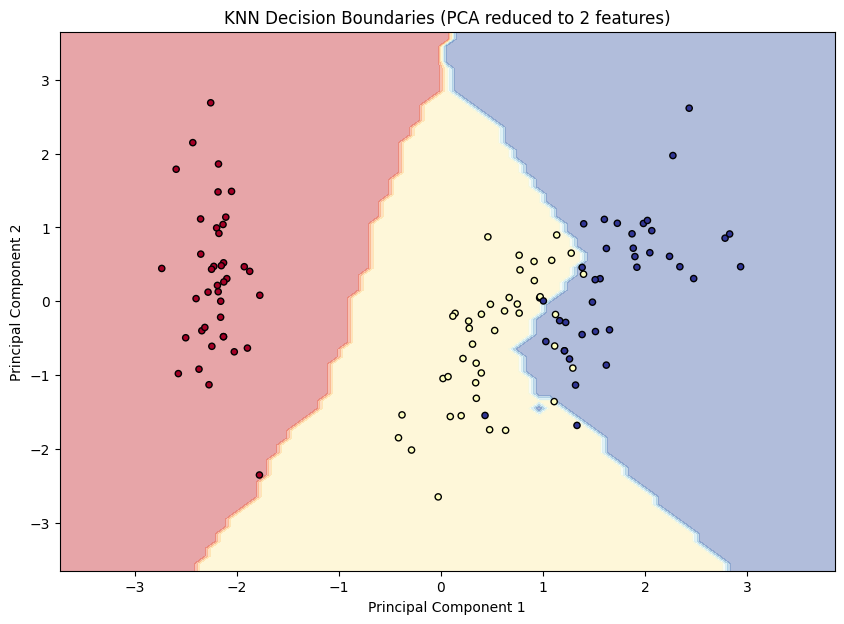

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier

# Since we have more than 2 features, reduce dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create a meshgrid for plotting decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Train KNN on the reduced data and predict on the meshgrid
knn_pca = KNeighborsClassifier(n_neighbors=5) # Use k=5 as an example, you can change this
knn_pca.fit(X_train_pca, y_train)
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Map species names to numerical labels for plotting
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# Convert predicted species labels to numerical values
Z_num = np.array([species_map[label] for label in Z.ravel()]).reshape(xx.shape)
y_train_num = y_train.map(species_map)

# Plot the decision boundaries and data points
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z_num, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_num, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title("KNN Decision Boundaries (PCA reduced to 2 features)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()